# Packages

In [37]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, accuracy_score,precision_score,recall_score,fbeta_score
from sklearn import datasets, preprocessing, model_selection, ensemble,pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import datasets, preprocessing, model_selection, ensemble, pipeline
from mlflow.models.signature import infer_signature

# Téléchargement de la base de donnée

In [2]:
data = pd.read_csv('train2.csv', encoding = 'utf-8')

In [3]:
data

,SK_ID_CURR,TARGET,TARGET_name,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,EXT_SOURCE_3,CREDIT_TERM,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100002,1,Not Granted,1,0,202500.0,406597.5,0.018801,0.139376,0.060749,6.0,10.0,6.0
1,100003,0,Granted,0,0,270000.0,1293502.5,0.003541,0.746300,0.027598,12.0,3.0,1.0
2,100004,0,Granted,1,0,67500.0,135000.0,0.010032,0.729567,0.050000,12.0,12.0,7.0
3,100006,0,Granted,0,0,135000.0,312682.5,0.008019,0.746300,0.094941,5.0,27.0,7.0
4,100007,0,Granted,1,0,121500.0,513000.0,0.028663,0.746300,0.042623,6.0,12.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474647,439862,1,Not Granted,1,1,180000.0,254700.0,0.025164,0.263647,0.113339,1.0,25.0,4.0
474648,351708,1,Not Granted,0,0,247500.0,835380.0,0.018029,0.178760,0.048265,1.0,31.0,9.0
474649,263267,1,Not Granted,1,0,202500.0,384048.0,0.025164,0.636376,0.046951,1.0,10.0,6.0
474650,226916,1,Not Granted,0,0,157500.0,66829.5,0.019101,0.103449,0.093664,1.0,5.0,10.0


# Modélisation

## Train Test Split

In [4]:
X1 = data.drop(["SK_ID_CURR", "TARGET","TARGET_name"], axis = 1) 
y1 = data.TARGET
features = data.drop(['SK_ID_CURR', 'TARGET','TARGET_name'],axis=1).columns.values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2, random_state=1)

## Normalisation

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Tableau de corrélation

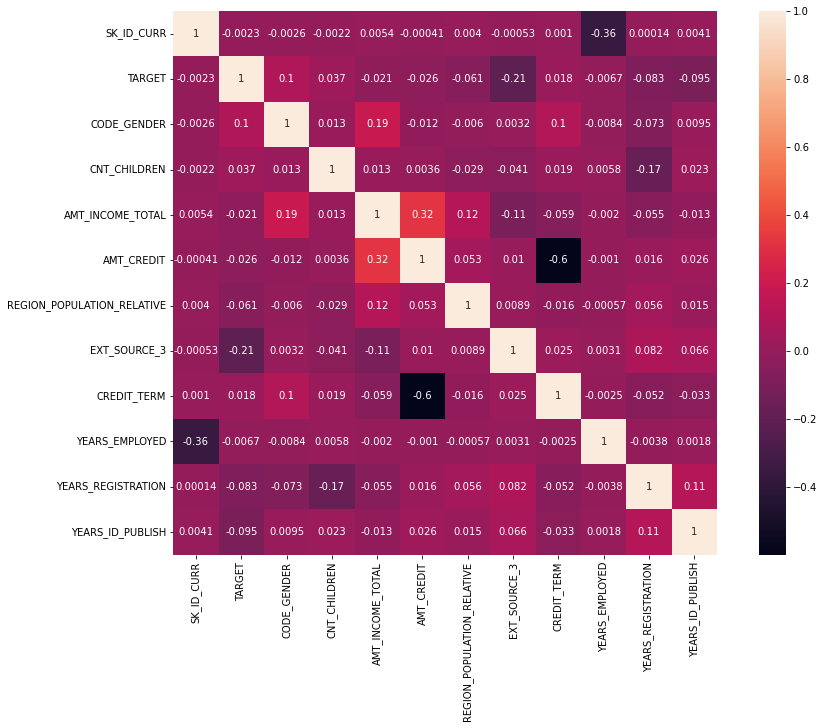

In [7]:
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(data.corr(),annot = True,square=True);

## Entrainement du modèle

In [8]:
regressor = RandomForestClassifier()
params = {
    "n_estimators":[50,100],
    "max_depth":[2,4,8],
   # "bootstrap":[True, False],
    "max_features":['auto', 'sqrt']
#     "min_samples_split":[2, 5, 10],
#     "min_samples_leaf":[1, 2, 4]
}

gsv = model_selection.GridSearchCV(regressor, params, cv=5)
gsv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100]})

In [9]:
gsv.best_score_, gsv.best_params_

(0.6545595333413964,
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100})

In [10]:
gsv.best_estimator_.score(X_test, y_test)

C:\Users\virgi\anaconda3\envs\projet_6_oc\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.5005846351560607

## Pipeline

In [39]:
pipeline = pipeline.Pipeline([('scaler', preprocessing.StandardScaler()), 
                              ('regressor', RandomForestClassifier(**gsv.best_params_))])

In [40]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestClassifier(max_depth=8))])

In [41]:
pipeline.score(X_test, y_test)

0.6552759372596939

In [42]:
pred = pipeline.predict(X_test)

# Quelques métriques d'évaluation

In [43]:
print('Train score', pipeline.score(X_train, y_train))
print('Test score', pipeline.score(X_test, y_test))
print("Acurracy score",accuracy_score(y_test,pred))
print("recall score" ,recall_score(y_test, pred))
print("precision score" ,precision_score(y_test, pred))
print("f1 score", f1_score(y_test,pred))
print("f0.5 score", fbeta_score(y_test,pred, beta=0.5))
print("f1 score", fbeta_score(y_test,pred, beta=1))
print("f2 score", fbeta_score(y_test,pred, beta=2))

Train score 0.6561949431292976
Test score 0.6552759372596939
Acurracy score 0.6552759372596939
recall score 0.6173071244780023
precision score 0.6674952678510342
f1 score 0.6414209482484687
f0.5 score 0.6568152237332257
f1 score 0.6414209482484687
f2 score 0.6267317616325132


In [47]:
print("f0.1 score", fbeta_score(y_test,pred, beta=0.1))

f0.5 score 0.6669583878759492


### Matrice de confusion

In [59]:
confusion_matrix(y_test,pred)

array([[32937, 14580],
       [18145, 29269]], dtype=int64)

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (474652).

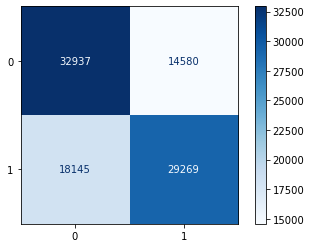

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = data.TARGET
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        pipeline,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Fonction de coût

In [44]:
from sklearn.metrics import fbeta_score, make_scorer

In [48]:
half_beta = make_scorer(fbeta_score, beta=0.1)
half_beta

make_scorer(fbeta_score, beta=0.1)

In [49]:
gsv = model_selection.GridSearchCV(regressor, params, cv=5, scoring=half_beta)
gsv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100]},
             scoring=make_scorer(fbeta_score, beta=0.1))

### Evaluation de l'optimisation

In [50]:
pipeline.score(X_test, y_test)

0.6552759372596939

### ### roc_auc_score

In [68]:
roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

0.7170149126435419

# Interpretation locale avec SHAP

In [51]:
import shap
from sklearn import tree

In [52]:
explainer = shap.TreeExplainer(pipeline.named_steps['regressor'])

In [53]:
shap_values = explainer.shap_values(X_train)

In [54]:
shap_values[0]

array([[-0.04710067,  0.00095827,  0.02265457, ...,  0.00214109,
         0.05361818,  0.03953499],
       [-0.0471    ,  0.00095872,  0.02265468, ...,  0.00208354,
         0.05357673,  0.03949594],
       [ 0.02882307,  0.00247612,  0.01454236, ...,  0.00093804,
         0.04565006,  0.04028746],
       ...,
       [-0.04782246,  0.00071243,  0.02244798, ...,  0.00212827,
         0.05386468,  0.03964764],
       [-0.04869249,  0.00144546,  0.02256416, ...,  0.00447442,
         0.05292826,  0.03669586],
       [ 0.02886698,  0.00247547,  0.01460706, ...,  0.00103434,
         0.04617097,  0.04045553]])

In [55]:
shap_values[1].shape

(379721, 10)

In [56]:
shap.initjs()

In [57]:
i = 4
shap.force_plot(explainer.expected_value[0], shap_values[0][i], features=X_train.iloc[i], feature_names=X_train.columns)

#####  Pour cet individu la prédiction sera de 1 car sa prédiction 0.67>0.5> base values=.499. Il est tiré vers le haut par un certai nombre de variables en route principalement ext_source_3, years_id_publish et vers le bas par credit_term et region

## Sérialisation

In [21]:
joblib.dump(pipeline, 'pipeline1_credit1.joblib')

['pipeline1_credit1.joblib']